# huggingface + WRIME„Éá„Éº„Çø„Çª„ÉÉ„Éà „ÅßÊÑüÊÉÖÊé®ÂÆö

## Áí∞Â¢ÉÊßãÁØâ

In [1]:
# huggingface transformer „ÅÆ„Ç§„É≥„Çπ„Éà„Éº„É´
# - transformers : ‰∏ª„Åü„Çã„É¢„Ç∏„É•„Éº„É´Ôºà„É¢„Éá„É´„ÇÑ„Éà„Éº„ÇØ„Éä„Ç§„Ç∂„ÅÆ„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ)
# - datasets : HuggingFace„Åß„ÄÅ„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÇíÊâ±„ÅÜ„Åü„ÇÅ„ÅÆ„É¢„Ç∏„É•„Éº„É´
# https://huggingface.co/docs/transformers/installation
! pip install transformers datasets

# Êù±ÂåóÂ§ßÂ≠¶„ÅÆÊó•Êú¨Ë™ûÁî®BERT‰ΩøÁî®„Å´ÂøÖË¶Å„Å™„Éë„ÉÉ„Ç±„Éº„Ç∏„Çí„Ç§„É≥„Çπ„Éà„Éº„É´
! pip install fugashi ipadic

In [2]:
import numpy as np
import pandas as pd

In [3]:
pip install datasets==v2.11.0

In [4]:
# Hugging Face (Transformers) Èñ¢ÈÄ£„ÅÆ„É¢„Ç∏„É•„Éº„É´
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from datasets import Dataset, load_metric

### Matplotlib„ÅßÊó•Êú¨Ë™û„Çí‰ΩøÁî®„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„Çã

In [5]:
# [ÂâçÊ∫ñÂÇô] Matplotlib „ÅßÊó•Êú¨Ë™û„Éï„Ç©„É≥„Éà„Çí‰ΩøÁî®„Åß„Åç„Çã„Çà„ÅÜ„Å´„Åô„Çã
# cf. https://blog.3qe.us/entry/2018/08/16/121457
!apt-get -y install fonts-ipafont-gothic
!rm /root/.cache/matplotlib/fontlist-v310.json

# NOTE „Åì„Åì„Åß„ÄÅ„É©„É≥„Çø„Ç§„É†„ÇíÂÜçËµ∑Âãï

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
rm: cannot remove '/root/.cache/matplotlib/fontlist-v310.json': No such file or directory


Text(0.5, 1.0, 'Êó•Êú¨Ë™û„ÇíË°®Á§∫„Åß„Åç„Çã„Åã„ÉÜ„Çπ„Éà')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12434 (\N{HIRAGANA LETTER WO}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 34920 (\N{CJK UNIFIED IDEOGRAPH-8868}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 31034 (

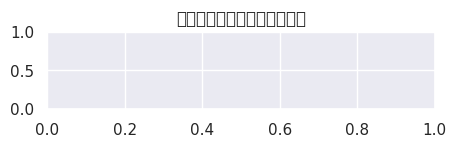

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')

# Âãï‰ΩúÁ¢∫Ë™ç
plt.figure(figsize=(5,1))
plt.title('Êó•Êú¨Ë™û„ÇíË°®Á§∫„Åß„Åç„Çã„Åã„ÉÜ„Çπ„Éà')

## „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊ∫ñÂÇô

### WRIME„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆ„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ

In [7]:
# GitHub„Çà„ÇäWRIME„Éá„Éº„Çø„Çí„ÉÄ„Ç¶„É≥„É≠„Éº„Éâ„Åô„Çã
#
# WRIME dataset : https://github.com/ids-cv/wrime
# ‰ªäÂõû‰ΩøÁî®„Åô„Çã„ÅÆ„ÅØ ver1 ÔºàÊÑüÊÉÖÊ•µÊÄß„Åå‰ªò‰∏é„Åï„Çå„Å¶„ÅÑ„Å™„ÅÑÁâàÔºâ
! wget https://github.com/ids-cv/wrime/raw/master/wrime-ver1.tsv

--2025-02-13 15:06:26--  https://github.com/ids-cv/wrime/raw/master/wrime-ver1.tsv
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ids-cv/wrime/master/wrime-ver1.tsv [following]
--2025-02-13 15:06:27--  https://raw.githubusercontent.com/ids-cv/wrime/master/wrime-ver1.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9487235 (9.0M) [text/plain]
Saving to: ‚Äòwrime-ver1.tsv.1‚Äô

wrime-ver1.tsv.1    100%[===================>]   9.05M  --.-KB/s    in 0.06s   

2025-02-13 15:06:27 (151 MB/s) - ‚Äòwrime-ver1.tsv.1‚Äô saved [9487235/9487235]



In [8]:
# pandas.DataFrame„Å®„Åó„Å¶Ë™≠„ÅøËæº„ÇÄ
df_wrime = pd.read_table('wrime-ver1.tsv')
df_wrime.head(2)

Sentence  UserID  \
0                     „Åº„Åë„Å£„Å®„Åó„Å¶„Åü„Çâ„Åì„Çì„Å™ÊôÇÈñìÔΩ°„ÉÅ„É£„É™„ÅÇ„Çã„Åã„ÇâÈ£ü„Åπ„Å´„Åß„Åü„ÅÑ„ÅÆ„Å´‚Ä¶       1   
1  ‰ªäÊó•„ÅÆÊúà„ÇÇÁôΩ„Åè„Å¶Êòé„Çã„ÅÑ„ÄÇÊò®Êó•„Çà„ÇäÈõ≤„ÅåÂ∞ë„Å™„Åè„Å¶„Ç≠„É¨„Ç§„Å™? „Å®Á´ã„Å°Ê≠¢„Åæ„ÇãÂ∏∞„ÇäÈÅìÔΩ°„ÉÅ„É£„É™„Å™„ÅóÁîüÊ¥ª„ÇÇ...       1   

           Datetime Train/Dev/Test  Writer_Joy  Writer_Sadness  \
0  2012/07/31 23:48          train           0               1   
1  2012/08/02 23:09          train           3               0   

   Writer_Anticipation  Writer_Surprise  Writer_Anger  Writer_Fear  ...  \
0                    2                1             1            0  ...   
1                    3                0             0            0  ...   

   Reader3_Disgust  Reader3_Trust  Avg. Readers_Joy  Avg. Readers_Sadness  \
0                1              0                 0                     2   
1                0              1                 1                     0   

   Avg. Readers_Anticipation  Avg. Readers_Surprise  Avg. Readers_Anger  \
0                          0                      0                   0   
1                          0                      2                   0   

   Avg. Readers_Fear  Avg. Readers_Disgust  Avg. Readers_Trust  
0                  0                     0                   0  
1                  0                     0                   0  

[2 rows x 44 columns]

### ÂâçÂá¶ÁêÜ

__ÂâçÊèê‚ë†ÔºöWRIME„Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆ„É©„Éô„É´„ÅØ„ÄÅÂêÑÊÑüÊÉÖ„ÅÆÂº∑Â∫¶__
- ÂêÑÊÑüÊÉÖÔºà‰æã„Åà„Å∞„ÄÅJoy=ÂñúÔºâ„ÅÆÂº∑Â∫¶„Çí„ÄÅ0„Äú3„ÅÆÔºîÊÆµÈöé„Åß„É©„Éô„É´‰ªò„Åë„Åó„Å¶„ÅÑ„Çã
- Ôºò„Å§„ÅÆÊÑüÊÉÖÂÖ®„Å¶„Å´„Åä„ÅÑ„Å¶„ÄÅÊúÄÈ†ª„É©„Éô„É´„ÅØ„Äå0„Äç


__ÂâçÊèê‚ë°ÔºöWRIME„Éá„Éº„Çø„Çª„ÉÉ„Éà„Å´„ÅØ„ÄÅË§áÊï∞Á®ÆÈ°û„ÅÆ„É©„Éô„É´„Åå‰ªò‰∏é„Åï„Çå„Å¶„ÅÑ„Çã__
1. Writer_*
    - ÊñáÁ´†„ÅÆ __Êõ∏„ÅçÊâã__ „ÅåËá™Ë∫´„Åß‰ªò‰∏é„Åó„Åü„É©„Éô„É´„ÄÇ„Äå‰∏ªË¶≥ÊÑüÊÉÖ„Äç„ÄÇ
2. Reader{1,2,3}_* :
    - ÊñáÁ´†„ÅÆ __Ë™≠„ÅøÊâã__ „Åå‰ªò‰∏é„Åó„Åü„É©„Éô„É´„ÄÇ„ÄåÂÆ¢Ë¶≥ÊÑüÊÉÖ„Äç„ÄÇÔºìÂêçÂàÜ„ÄÇ
3. Avg.Readers_*
    - ÔºìÂêçÂàÜ„ÅÆÂÆ¢Ë¶≥ÊÑüÊÉÖ„ÅÆÂπ≥ÂùáÂÄ§„ÄÇ

ÂïèÈ°åË®≠ÂÆö
1. Ôºò„Å§„ÅÆÊÑüÊÉÖ„ÅÆ„ÄÅÂàÜÈ°û„Çø„Çπ„ÇØ„Å®„Åó„Å¶Êâ±„ÅÜ
    - Áõ∏ÂØæÁöÑ„Å´„Å©„ÅÆÊÑüÊÉÖ„ÅåÂº∑„ÅÑ„Åã„ÇíÊé®ÂÆö„Åô„Çã
    - „Éá„Éº„Çø„Çª„ÉÉ„Éà„ÅÆÊú¨Êù•„ÅÆÁî®ÈÄî„Å®„Åó„Å¶„ÅØÊÑüÊÉÖÂº∑Â∫¶„ÇíÊé®ÂÆö„Åô„Çã„Çø„Çπ„ÇØ„ÄÇ„Åó„Åã„Åó„Å™„Åå„Çâ„ÄÅÊÑüÊÉÖÂº∑Â∫¶=0„ÅÆ„Çµ„É≥„Éó„É´„ÅåÂ§ö„Åè„ÄÅ„ÇÑ„ÇÑÊâ±„ÅÑ„ÅåÈõ£„Åó„ÅÑ„Åü„ÇÅ„ÄÅ‰ªäÂõû„ÅØÁ∞°Á¥†Âåñ„Åó„Å¶Êâ±„ÅÜ„ÄÇ
2. ÂÆ¢Ë¶≥ÊÑüÊÉÖ„ÅÆÂπ≥ÂùáÂÄ§„Çí‰ΩøÁî®„Åô„Çã
    - Ë´ñÊñá„Å´„Åä„ÅÑ„Å¶„ÄÅ‰∏ªË¶≥ÊÑüÊÉÖ„Å®ÂÆ¢Ë¶≥ÊÑüÊÉÖ„ÅØÁï∞„Å™„Çã„Åì„Å®„ÅåÊåáÊëò„Åï„Çå„Å¶„ÅÑ„Çã
    - ‰∏ªË¶≥ÊÑüÊÉÖ„ÅØ„ÄÅÊõ∏„ÅçÊâã„ÅÆÊÄßÊ†º„ÇÑË°®ÁèæÊñπÊ≥ï„Å´‰æùÂ≠ò„Åô„ÇãÈÉ®ÂàÜ„Åå„ÅÇ„Çã„ÄÇ„Åù„ÅÆ„Åü„ÇÅ„ÄÅÂÆ¢Ë¶≥ÊÑüÊÉÖ„ÄÅ„Åã„Å§„ÄÅ„Åù„ÅÆÂπ≥ÂùáÂÄ§„ÇíÁî®„ÅÑ„Çã„Åì„Å®„Åß„ÄÅÊé®ÂÆöÁµêÊûú„ÅÆÁ¥çÂæóÊÑü„ÅåÈ´ò„Åè„Å™„Çã„Åì„Å®„ÅåÊúüÂæÖ„Åï„Çå„Çã

In [9]:
# Plutchik„ÅÆ8„Å§„ÅÆÂü∫Êú¨ÊÑüÊÉÖ
emotion_names = ['Joy', 'Sadness', 'Anticipation', 'Surprise', 'Anger', 'Fear', 'Disgust', 'Trust']
emotion_names_jp = ['Âñú„Å≥', 'ÊÇ≤„Åó„Åø', 'ÊúüÂæÖ', 'È©ö„Åç', 'ÊÄí„Çä', 'ÊÅê„Çå', 'Â´åÊÇ™', '‰ø°È†º']  # Êó•Êú¨Ë™ûÁâà
num_labels = len(emotion_names)

# readers_emotion_intensities Âàó„ÇíÁîüÊàê„Åô„Çã
# "Avg. Readers_*" „ÅÆÂÄ§„ÇílistÂåñ„Åó„Åü„ÇÇ„ÅÆ
df_wrime['readers_emotion_intensities'] = df_wrime.apply(lambda x: [x['Avg. Readers_' + name] for name in emotion_names], axis=1)

# ÊÑüÊÉÖÂº∑Â∫¶„Åå‰Ωé„ÅÑ„Çµ„É≥„Éó„É´„ÅØÈô§Â§ñ„Åô„Çã
# (readers_emotion_intensities „ÅÆ max „ÅåÔºí‰ª•‰∏ä„ÅÆ„Çµ„É≥„Éó„É´„ÅÆ„Åø„ÇíÂØæË±°„Å®„Åô„Çã)
is_target = df_wrime['readers_emotion_intensities'].map(lambda x: max(x) >= 2)
df_wrime_target = df_wrime[is_target]

In [10]:
# train / test „Å´ÂàÜÂâ≤„Åô„Çã
df_groups = df_wrime_target.groupby('Train/Dev/Test')
df_train = df_groups.get_group('train')
df_test = pd.concat([df_groups.get_group('dev'), df_groups.get_group('test')])
print('train :', len(df_train))
print('test :', len(df_test))

train : 17104
test : 1133


## „É¢„Éá„É´(BERT)„ÇíË®ìÁ∑¥„Åô„Çã

### Tokenizer„ÅßÂÖ•Âäõ„Éá„Éº„Çø„Å´Â§âÊèõ

In [13]:
! pip install unidic-lite

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 47.4/47.4 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658818 sha256=13c8b0071b0e4597acf763dd7375d00ac7a9ea4d0a654d8e652308a7d0df570c
  Stored in directory: /root/.cache/pip/wheels/b7/fd/e9/ea4459b868e6d2902e8d80e82dbacb6203e05b3b3a58c64966
Successfully built unidic-lite


In [14]:
# ‰ΩøÁî®„Åô„Çã„É¢„Éá„É´„ÇíÊåáÂÆö„Åó„Å¶„ÄÅTokenizer„ÇíË™≠„ÅøËæº„ÇÄ
checkpoint = 'cl-tohoku/bert-base-japanese-whole-word-masking'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [15]:
# ÂâçÂá¶ÁêÜÈñ¢Êï∞: tokenize_function
# ÊÑüÊÉÖÂº∑Â∫¶„ÅÆÊ≠£Ë¶èÂåñÔºàÁ∑èÂíå=1Ôºâ„ÇÇÂêåÊôÇ„Å´ÂÆüÊñΩ„Åô„Çã
def tokenize_function(batch):
    tokenized_batch = tokenizer(batch['Sentence'], truncation=True, padding='max_length')
    tokenized_batch['labels'] = [x / np.sum(x) for x in batch['readers_emotion_intensities']]  # Á∑èÂíå=1„Å´Ê≠£Ë¶èÂåñ
    return tokenized_batch

# TransformersÁî®„ÅÆ„Éá„Éº„Çø„Çª„ÉÉ„ÉàÂΩ¢Âºè„Å´Â§âÊèõ
# pandas.DataFrame -> datasets.Dataset
target_columns = ['Sentence', 'readers_emotion_intensities']
train_dataset = Dataset.from_pandas(df_train[target_columns])
test_dataset = Dataset.from_pandas(df_test[target_columns])

# ÂâçÂá¶ÁêÜÔºàtokenize_functionÔºâ „ÇíÈÅ©Áî®
train_tokenized_dataset = train_dataset.map(tokenize_function, batched=True)
test_tokenized_dataset = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/17104 [00:00<?, ? examples/s]

Map:   0%|          | 0/1133 [00:00<?, ? examples/s]

### Ë®ìÁ∑¥Ê∏à„Åø„É¢„Éá„É´„ÅÆË™≠„ÅøËæº„Åø

In [16]:
# ÂàÜÈ°û„É¢„Éá„É´„ÅÆ„Åü„ÇÅ AutoModelForSequenceClassification „Çí‰ΩøÁî®„Åô„Çã
# checkpoint „Å® num_labelsÔºà„ÇØ„É©„ÇπÊï∞Ôºâ „ÇíÊåáÂÆö„Åô„Çã. ‰ªäÂõû„ÅØ„ÄÅ„ÅÑ„Åö„Çå„ÇÇ‰∏ä„ÅßÂÆöÁæ©Ê∏à„Åø
# - checkpoint = 'cl-tohoku/bert-base-japanese-whole-word-masking'
# - num_labels = 8
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels)

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


### Ë®ìÁ∑¥„ÇíÂÆüË°å

In [17]:
# Ë©ï‰æ°ÊåáÊ®ô„ÇíÂÆöÁæ©
# https://huggingface.co/docs/transformers/training
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    label_ids = np.argmax(labels, axis=-1)
    return metric.compute(predictions=predictions, references=label_ids)

<ipython-input-17-175910f6c859>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [20]:
import os
os.environ['WANDB_DISABLED'] = 'true'

In [ ]:
# Transformers „ÅÆ Trainer „ÇíÁî®„ÅÑ„Çã
# https://huggingface.co/docs/transformers/v4.21.1/en/main_classes/trainer#transformers.TrainingArguments

# Ë®ìÁ∑¥ÊôÇ„ÅÆË®≠ÂÆö
training_args = TrainingArguments(
    output_dir="test_trainer",
    per_device_train_batch_size=8,
    evaluation_strategy="steps", eval_steps=200)  # 200„Çπ„ÉÜ„ÉÉ„ÉóÊØé„Å´„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅßË©ï‰æ°„Åô„Çã

# Trainer„ÇíÁîüÊàê
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized_dataset,
    eval_dataset=test_tokenized_dataset,
    compute_metrics=compute_metrics,
)

# Ë®ìÁ∑¥„ÇíÂÆüË°å
trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of ü§ó Transformers. Use `eval_strategy` instead
  warnings.warn(
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


## Ë®ìÁ∑¥„Åó„Åü„É¢„Éá„É´„ÅßÊé®Ë´ñ„Åô„Çã

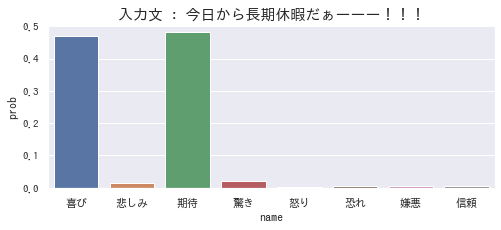

In [ ]:
# https://www.delftstack.com/ja/howto/numpy/numpy-softmax/
def np_softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

def analyze_emotion(text, show_fig=False, ret_prob=False):
    # Êé®Ë´ñ„É¢„Éº„Éâ„ÇíÊúâÂäπ„Åã
    model.eval()

    # ÂÖ•Âäõ„Éá„Éº„ÇøÂ§âÊèõ + Êé®Ë´ñ
    tokens = tokenizer(text, truncation=True, return_tensors="pt")
    tokens.to(model.device)
    preds = model(**tokens)
    prob = np_softmax(preds.logits.cpu().detach().numpy()[0])
    out_dict = {n: p for n, p in zip(emotion_names_jp, prob)}

    # Ê£í„Ç∞„É©„Éï„ÇíÊèèÁîª
    if show_fig:
        plt.figure(figsize=(8, 3))
        df = pd.DataFrame(out_dict.items(), columns=['name', 'prob'])
        sns.barplot(x='name', y='prob', data=df)
        plt.title('ÂÖ•ÂäõÊñá : ' + text, fontsize=15)

    if ret_prob:
        return out_dict

# Âãï‰ΩúÁ¢∫Ë™ç
analyze_emotion('‰ªäÊó•„Åã„ÇâÈï∑Êúü‰ºëÊöá„Å†„ÅÅ„Éº„Éº„ÉºÔºÅÔºÅÔºÅ', show_fig=True)

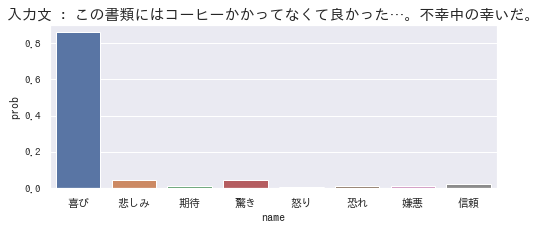

In [ ]:
analyze_emotion('„Åì„ÅÆÊõ∏È°û„Å´„ÅØ„Ç≥„Éº„Éí„Éº„Åã„Åã„Å£„Å¶„Å™„Åè„Å¶ËâØ„Åã„Å£„Åü‚Ä¶„ÄÇ‰∏çÂπ∏‰∏≠„ÅÆÂπ∏„ÅÑ„Å†„ÄÇ', show_fig=True)

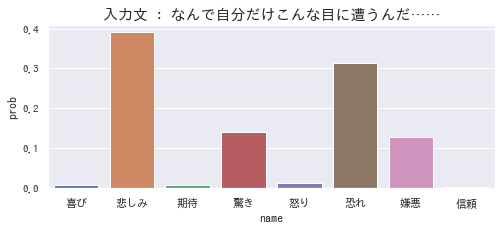

In [ ]:
analyze_emotion('„Å™„Çì„ÅßËá™ÂàÜ„Å†„Åë„Åì„Çì„Å™ÁõÆ„Å´ÈÅ≠„ÅÜ„Çì„Å†‚Ä¶‚Ä¶', show_fig=True)

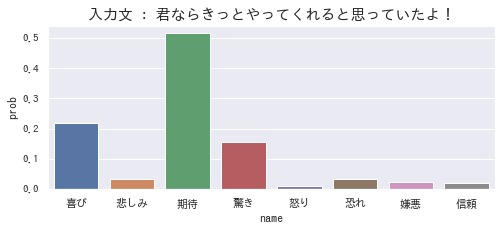

In [ ]:
analyze_emotion('Âêõ„Å™„Çâ„Åç„Å£„Å®„ÇÑ„Å£„Å¶„Åè„Çå„Çã„Å®ÊÄù„Å£„Å¶„ÅÑ„Åü„ÇàÔºÅ', show_fig=True)

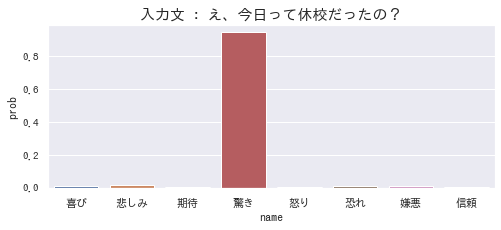

In [ ]:
analyze_emotion('„Åà„ÄÅ‰ªäÊó•„Å£„Å¶‰ºëÊ†°„Å†„Å£„Åü„ÅÆÔºü', show_fig=True)

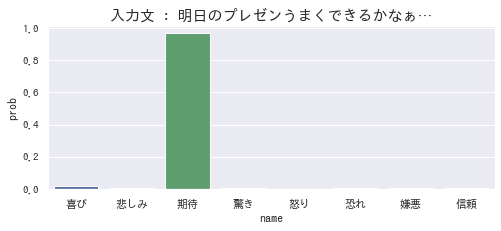

In [ ]:
analyze_emotion('ÊòéÊó•„ÅÆ„Éó„É¨„Çº„É≥„ÅÜ„Åæ„Åè„Åß„Åç„Çã„Åã„Å™„ÅÅ‚Ä¶', show_fig=True)

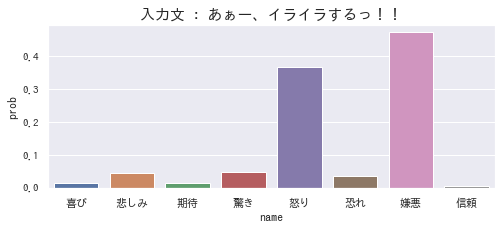

In [ ]:
analyze_emotion('„ÅÇ„ÅÅ„Éº„ÄÅ„Ç§„É©„Ç§„É©„Åô„Çã„Å£ÔºÅÔºÅ', show_fig=True)